In [2]:
# Parameters - Constants
TRAIN_FRACTION = 0.7

RANDOM_SEED = 86720

CV_VALIDATE_SPLIT = 5

MAX_TREE_DEPTH = 20

In [1]:
# Libraries to import
import re
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from mlxtend.evaluate import bias_variance_decomp
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


import matplotlib
from matplotlib import pyplot as plt


# font set for graphs
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

In [3]:
# Read Data into raw data
raw_data = pd.read_csv(r"..\..\data\diabetes\diabetes.csv")

In [4]:
classification = 'Outcome'
features = list(raw_data.columns)
features.remove(classification)

In [5]:
# Split into train and test
training_data = raw_data.sample(frac=TRAIN_FRACTION,random_state=RANDOM_SEED)
training_class = training_data.loc[:,classification].values
training_features = training_data.loc[:,features].values


test_data = raw_data.drop(index=training_data.index)
test_class = test_data.loc[:,classification].values
test_features = test_data.loc[:,features].values

In [6]:
criterion = 'entropy'
splitter  = 'best'
records=[]

samples_leaf=np.linspace(0.001,0.4,50)

for min_samples_leaf in samples_leaf:

    # Create a Decision Tree Classifier with the 
    # best split, mentioned number of leaf samples and entropy loss criterion
    
    dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,
                                   criterion=criterion,
                                   min_samples_leaf=min_samples_leaf,
                                   splitter=splitter)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            dtree,training_features, training_class, test_features, test_class, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED)

    print('MSL: %0.3f,Expected loss: %.3f, Bias: %.3f, Variance: %.3f' %(min_samples_leaf,avg_expected_loss,avg_bias,avg_var))
    records.append([min_samples_leaf,avg_expected_loss,avg_bias,avg_var])
    
mslbv_entropy=pd.DataFrame.from_records(records,columns=['MinSamplesLeaf','Loss','BiasSquare','Variance'])
mslbv_entropy.to_csv('Results/BVS_MSL_Entropy.csv',index=False)
    

MSL: 0.001,Expected loss: 0.279, Bias: 0.183, Variance: 0.213
MSL: 0.009,Expected loss: 0.275, Bias: 0.148, Variance: 0.211
MSL: 0.017,Expected loss: 0.257, Bias: 0.165, Variance: 0.192
MSL: 0.025,Expected loss: 0.249, Bias: 0.174, Variance: 0.180
MSL: 0.034,Expected loss: 0.241, Bias: 0.174, Variance: 0.170
MSL: 0.042,Expected loss: 0.234, Bias: 0.178, Variance: 0.161
MSL: 0.050,Expected loss: 0.233, Bias: 0.183, Variance: 0.160
MSL: 0.058,Expected loss: 0.228, Bias: 0.200, Variance: 0.150
MSL: 0.066,Expected loss: 0.226, Bias: 0.204, Variance: 0.144
MSL: 0.074,Expected loss: 0.223, Bias: 0.196, Variance: 0.138
MSL: 0.082,Expected loss: 0.221, Bias: 0.187, Variance: 0.130
MSL: 0.091,Expected loss: 0.219, Bias: 0.187, Variance: 0.124
MSL: 0.099,Expected loss: 0.218, Bias: 0.183, Variance: 0.120
MSL: 0.107,Expected loss: 0.218, Bias: 0.187, Variance: 0.115
MSL: 0.115,Expected loss: 0.219, Bias: 0.191, Variance: 0.113
MSL: 0.123,Expected loss: 0.219, Bias: 0.191, Variance: 0.111
MSL: 0.1

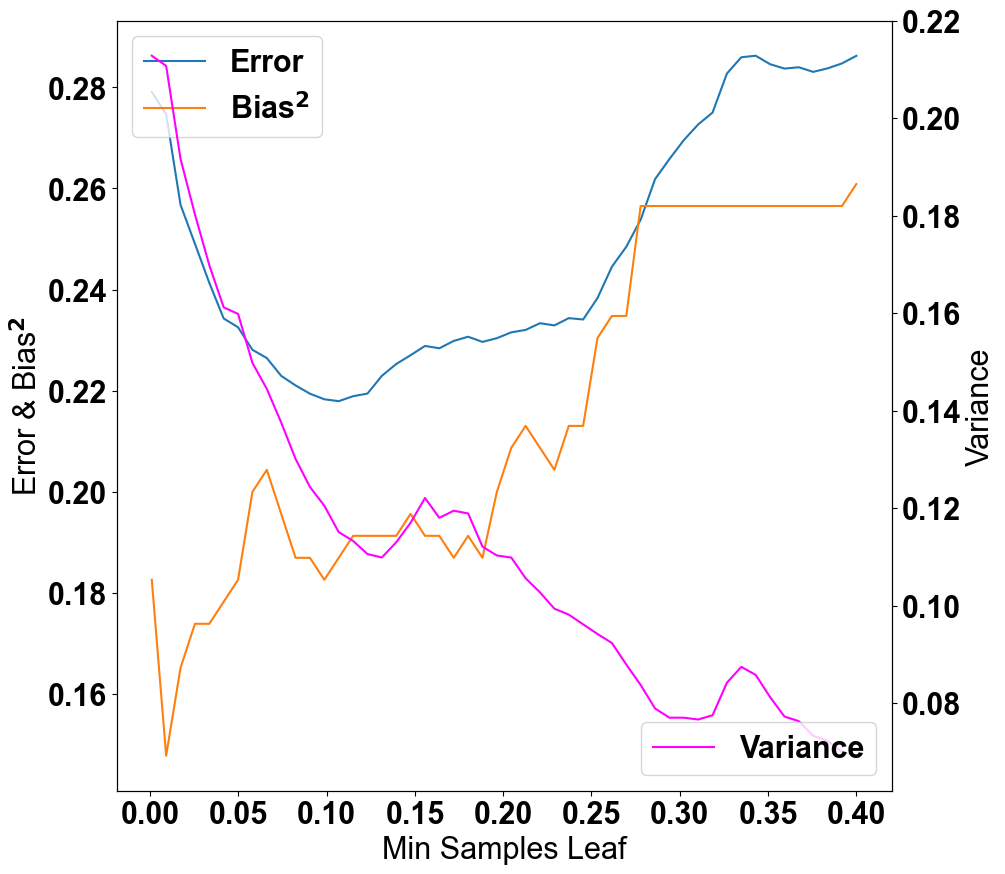

In [7]:
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Min Samples Leaf') 
ax1.plot(mslbv_entropy.iloc[:,0],mslbv_entropy.iloc[:,1])
ax1.plot(mslbv_entropy.iloc[:,0],mslbv_entropy.iloc[:,2])
ax1.set_xticks(np.linspace(0.0,0.4,9))

ax2=ax1.twinx()
ax2.plot(mslbv_entropy.iloc[:,0],mslbv_entropy.iloc[:,3],color='magenta')
ax2.set_ylabel('Variance') 
ax1.legend(['Error','Bias${^2}$'],loc='upper left')
ax2.legend(['Variance'],loc='lower right')

fig.savefig('Plots/BVS_MSL_Entropy.svg',format='svg')

plt.show()

In [9]:
criterion = 'entropy'
n_estimators = 100
max_features = 4
records=[]

samples_leaf=np.linspace(0.001,0.4,50)

for min_samples_leaf in samples_leaf:

    # Create a Random Forest Classifier with the 
    # number of estimators mentioned min samples leaf and entropy loss criterion
    dtree = RandomForestClassifier(n_estimators=n_estimators,
                                   random_state=RANDOM_SEED,
                                   max_features=max_features,
                                   criterion=criterion,
                                   min_samples_leaf=min_samples_leaf)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            dtree,training_features, training_class, test_features, test_class, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED)

    print('MSL: %0.3f,Expected loss: %.3f, Bias: %.3f, Variance: %.3f' %(min_samples_leaf,avg_expected_loss,avg_bias,avg_var))
    records.append([min_samples_leaf,avg_expected_loss,avg_bias,avg_var])
    
mslbv_rf_entropy=pd.DataFrame.from_records(records,columns=['MinSamplesLeaf','Loss','BiasSquare','Variance'])
mslbv_rf_entropy.to_csv('Results/BVS_RF_MSL_Entropy.csv',index=False)
    

MSL: 0.001,Expected loss: 0.204, Bias: 0.183, Variance: 0.091
MSL: 0.009,Expected loss: 0.198, Bias: 0.187, Variance: 0.089
MSL: 0.017,Expected loss: 0.195, Bias: 0.174, Variance: 0.084
MSL: 0.025,Expected loss: 0.195, Bias: 0.178, Variance: 0.077
MSL: 0.034,Expected loss: 0.196, Bias: 0.187, Variance: 0.070
MSL: 0.042,Expected loss: 0.196, Bias: 0.191, Variance: 0.064
MSL: 0.050,Expected loss: 0.196, Bias: 0.187, Variance: 0.060
MSL: 0.058,Expected loss: 0.197, Bias: 0.200, Variance: 0.055
MSL: 0.066,Expected loss: 0.197, Bias: 0.191, Variance: 0.053
MSL: 0.074,Expected loss: 0.196, Bias: 0.183, Variance: 0.052
MSL: 0.082,Expected loss: 0.198, Bias: 0.183, Variance: 0.049
MSL: 0.091,Expected loss: 0.198, Bias: 0.191, Variance: 0.047
MSL: 0.099,Expected loss: 0.197, Bias: 0.196, Variance: 0.047
MSL: 0.107,Expected loss: 0.198, Bias: 0.200, Variance: 0.047
MSL: 0.115,Expected loss: 0.197, Bias: 0.196, Variance: 0.046
MSL: 0.123,Expected loss: 0.197, Bias: 0.196, Variance: 0.046
MSL: 0.1

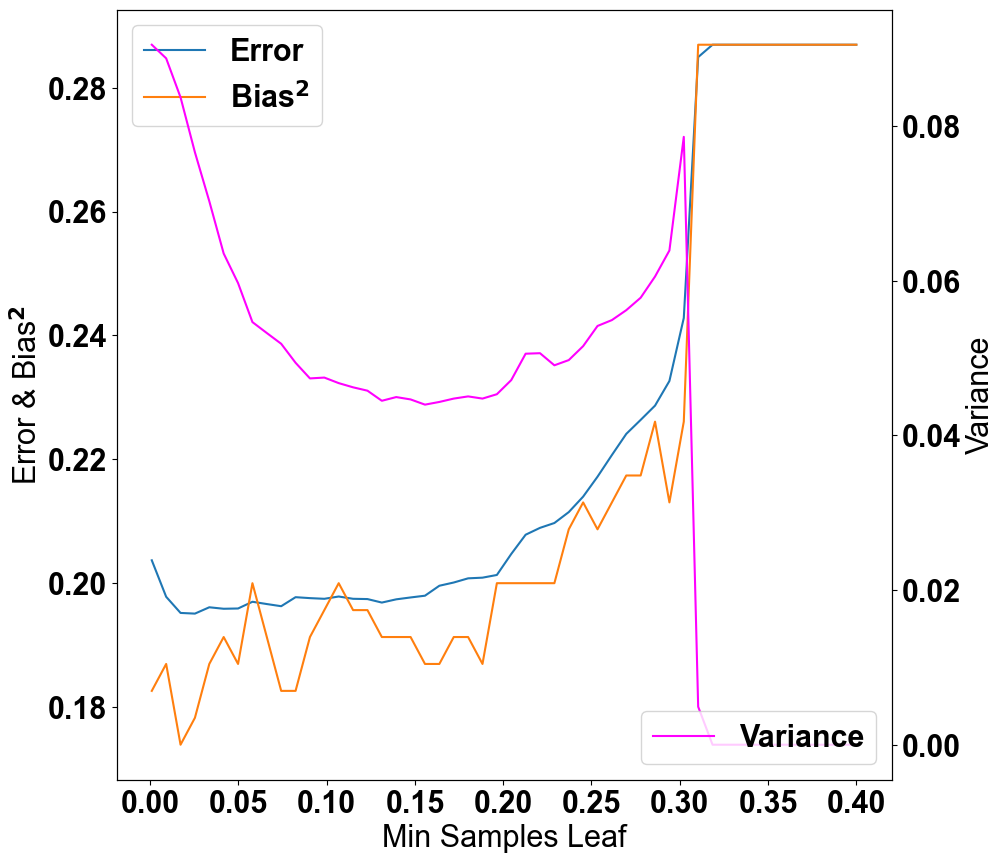

In [10]:
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Min Samples Leaf') 
ax1.plot(mslbv_rf_entropy.iloc[:,0],mslbv_rf_entropy.iloc[:,1])
ax1.plot(mslbv_rf_entropy.iloc[:,0],mslbv_rf_entropy.iloc[:,2])
ax1.set_xticks(np.linspace(0.0,0.4,9))

ax2=ax1.twinx()
ax2.plot(mslbv_rf_entropy.iloc[:,0],mslbv_rf_entropy.iloc[:,3],color='magenta')
ax2.set_ylabel('Variance') 
ax1.legend(['Error','Bias${^2}$'],loc='upper left')
ax2.legend(['Variance'],loc='lower right')

fig.savefig('Plots/BVS_MSL_RF_Entropy.svg',format='svg')

plt.show()

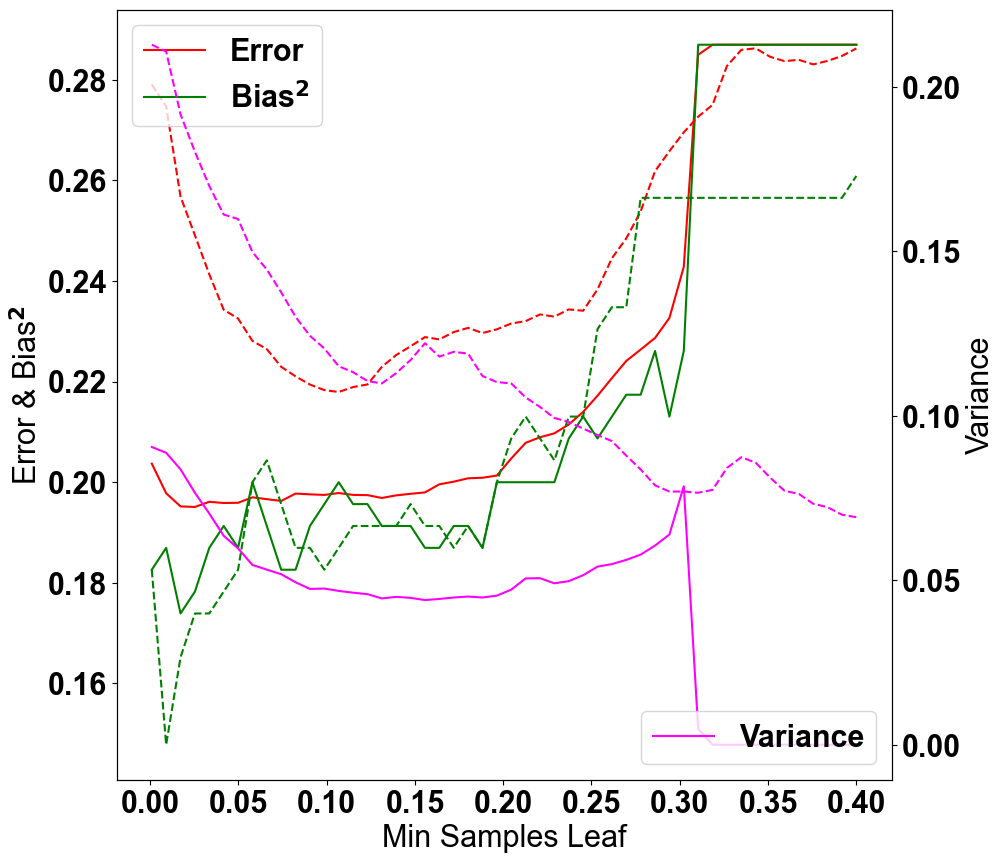

In [11]:
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Min Samples Leaf') 
ax1.plot(mslbv_rf_entropy.iloc[:,0],mslbv_rf_entropy.iloc[:,1],'-r')
ax1.plot(mslbv_rf_entropy.iloc[:,0],mslbv_rf_entropy.iloc[:,2],'-g')
ax1.plot(mslbv_entropy.iloc[:,0],mslbv_entropy.iloc[:,1],'--r')
ax1.plot(mslbv_entropy.iloc[:,0],mslbv_entropy.iloc[:,2],'--g')
ax1.set_xticks(np.linspace(0.0,0.4,9))

ax2=ax1.twinx()
ax2.plot(mslbv_rf_entropy.iloc[:,0],mslbv_rf_entropy.iloc[:,3],color='magenta')
ax2.plot(mslbv_entropy.iloc[:,0],mslbv_entropy.iloc[:,3],color='magenta',linestyle='dashed')
ax2.set_ylabel('Variance') 
ax1.legend(['Error','Bias${^2}$'],loc='upper left')
ax2.legend(['Variance'],loc='lower right')

fig.savefig('Plots/BVS_MSL_Comparison_RF_single_Entropy.svg',format='svg')

plt.show()